In [1]:
from mix_forward import mix_forward
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tqdm import tqdm_notebook

In [2]:
def cal_deltaC(matrix_C,f=0.5):
    res = 0.
    Nr,Nc = matrix_C.shape
    center = matrix_C[0,:]
    
    for i in range(1,Nr):
        
        res = res + np.abs(matrix_C[i,:]-center).sum()
    
    return res/(2*Nc*f*(1-f)*(Nr-1))

In [3]:
def cal_covh(matrix_h):
    res = 0.
    Nr,Nc = matrix_h.shape
    center = matrix_h[0,:]
    
    for i in range(1,Nr):
        
        res = res + np.dot(center,matrix_h[i,:])
    
    return res/float(Nr)

### 1. Check sparsity

In [4]:
P = 40
K = 5
N = 100
M = 100
Nm = 3
Nc = 1000

In [5]:
model_3_noise = mix_forward(Nm,N,M,P,K,Nc)
model_3_noise.generate_input()

In [6]:
m1,h1,T1 = model_3_noise.order_m(1,return_h=True)
m2,h2,T2 = model_3_noise.order_m(2,return_h=True)
m3,h3,T3 = model_3_noise.order_m(3,return_h=True)

In [7]:
print(T1,T2,T3)

0.0037919792137573183 -0.0188148302518793 0.00899851384018513


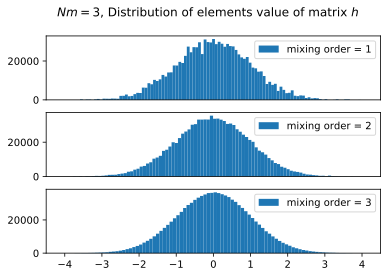

In [31]:
display.set_matplotlib_formats('svg')

fig,ax=plt.subplots(3,1)

ax[0].hist(h1.flatten(),bins=100,label= 'mixing order = 1')
ax[0].legend()
ax[0].set_xlim(-4.5,4.5)
ax[0].set_xticks([])

ax[1].hist(h2.flatten(),bins=100,label= 'mixing order = 2')
ax[1].legend()
ax[1].set_xlim(-4.5,4.5)
ax[1].set_xticks([])

ax[2].hist(h3.flatten(),bins=100,label= 'mixing order = 3')
ax[2].legend()
ax[2].set_xlim(-4.5,4.5)

plt.suptitle(r'$Nm=3$, Distribution of elements value of matrix $h$')

plt.show()

In [32]:
print(np.std(h1.flatten()),np.std(h2.flatten()),np.std(h3.flatten()))

1.0032512071820525 0.9997955973927549 0.9953510589863558


#### 1.1 Threshold T

In [35]:
P = 40
K = 5
N = 100
M = 100
Nm = 3
Nc = 1000
flist = 10**np.linspace(-3,-0.2,20)

In [36]:
model_3_T = mix_forward(Nm,N,M,P,K,Nc)
model_3_T.generate_input()

In [38]:
T_record = np.zeros((3,20))

for m in tqdm_notebook(range(1,4)):
    
    for i,f in enumerate(flist):
        
        Cm,T = model_3_noise.order_m(m,f=f)
        T_record[m-1,i] = T

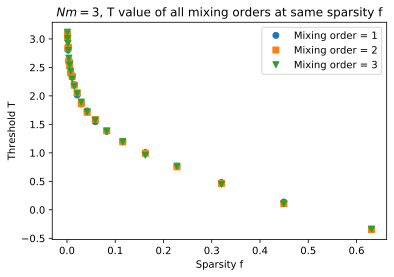

In [41]:
plt.plot(flist,T_record[0,:],'o',label='Mixing order = 1')
plt.plot(flist,T_record[1,:],'s',label='Mixing order = 2')
plt.plot(flist,T_record[2,:],'v',label='Mixing order = 3')

plt.xlabel('Sparsity f')
plt.ylabel('Threshold T')
plt.title(r'$Nm=3$, T value of all mixing orders at same sparsity f')
plt.legend()
plt.show()

#### some support calculation

In [42]:
N = 100
Nc = 1000

In [62]:
J_10 = np.random.normal(0,1 / np.sqrt(2*N),size=[N,Nc])

In [63]:
xi = np.sign(np.random.randn(50,N))

In [64]:
J_10.shape

(100, 1000)

In [65]:
xi.shape

(50, 100)

In [66]:
test = np.matmul(xi,J_10)

In [67]:
np.std(test.flatten())

0.7069585624318712